<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Regression: Exercise</h2>
<div>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [17]:
def genarate_data_1d(points, min, max, fn, noise, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(low=min, high=max, size=(points, 1))
    np.random.seed(seed)
    y = fn(x[:,0]) + np.random.normal(scale=noise, size=points)
    return x, y

def plot(x, y, pred_x=None, pred_y=None, ax=plt):
    ax.plot(x, y, '.', label='data')
    if pred_x is not None:
        ax.plot(pred_x, pred_y, '.', color='r', label='our function')
    ax.legend();

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise solved</strong>
  <p>Train a linear model to fit the data</p>
<div>

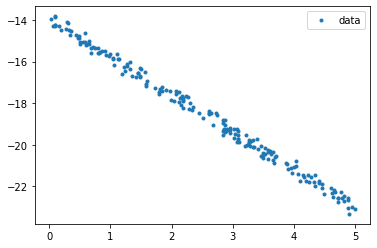

In [18]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=lambda x: -x*1.8 - 14, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

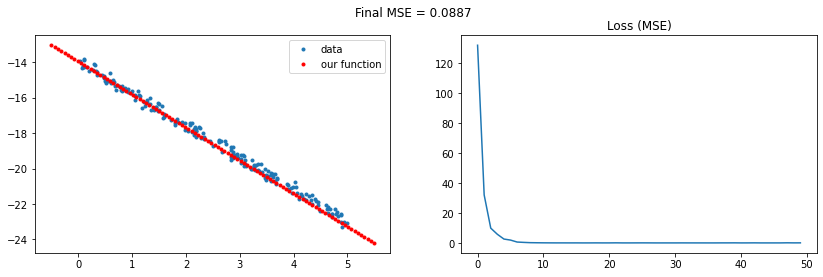

In [19]:
inp = keras.Input(shape=(1,))
out = layers.Dense(1, name='regression')(inp)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=50, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 1</strong>
  <p>Train a MLP in less than 100 epochs to get a MSE lower than 0.1</p>
<div>

In [72]:
inp = keras.Input(shape = (1,))
out = layers.Dense(1, name = 'regression')(inp)
model = keras.Model(inputs = inp, outputs = out)
model.compile(loss = 'mse', optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y, epochs = 90, batch_size = 100, verbose = 0)
model.summary()

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
regression (Dense)           (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [106]:
model = keras.Sequential([
    layers.Dense(units = 7, activation = 'relu', input_shape =(1,)),
    layers.Dense(units = 7, activation ='relu'),
    #output
    layers.Dense(units = 1, name = 'regression')
])

Epoch 1/60
4/4 [==============================] - 0s 1000us/step - loss: 0.2039
Epoch 2/60
4/4 [==============================] - 0s 999us/step - loss: 0.0852
Epoch 3/60
4/4 [==============================] - 0s 2ms/step - loss: 0.0777
Epoch 4/60
4/4 [==============================] - 0s 1ms/step - loss: 0.1009
Epoch 5/60
4/4 [==============================] - 0s 1ms/step - loss: 0.0776
Epoch 6/60
4/4 [==============================] - 0s 754us/step - loss: 0.0878
Epoch 7/60
4/4 [==============================] - 0s 1ms/step - loss: 0.1326
Epoch 8/60
4/4 [==============================] - 0s 999us/step - loss: 0.0824
Epoch 9/60
4/4 [==============================] - 0s 1ms/step - loss: 0.0734
Epoch 10/60
4/4 [==============================] - 0s 999us/step - loss: 0.0835
Epoch 11/60
4/4 [==============================] - 0s 1ms/step - loss: 0.1368
Epoch 12/60
4/4 [==============================] - 0s 750us/step - loss: 0.1181
Epoch 13/60
4/4 [==============================] - 0s 2ms/st

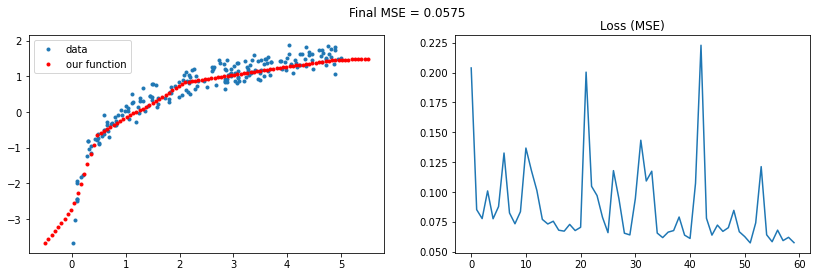

In [117]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=np.log, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
model.compile(loss='mse', optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y, epochs = 60, batch_size = 50, verbose = 1)
pred_y = model.predict(pred_x)
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 2</strong>
  <p>Train a MLP in less than 100 epochs to get a loss lower than 0.06</p>
<div>

In [145]:
model = keras.Sequential([
    layers.Dense(units = 7, activation = 'relu', input_shape =(1,)),
    layers.Dense(units = 15, activation ='relu'),
   
    #output
    layers.Dense(units = 1, name = 'regression')
])


Epoch 1/7
4/4 [==============================] - 0s 996us/step - loss: 0.0525
Epoch 2/7
4/4 [==============================] - 0s 1ms/step - loss: 0.0572
Epoch 3/7
4/4 [==============================] - 0s 999us/step - loss: 0.0723
Epoch 4/7
4/4 [==============================] - 0s 1ms/step - loss: 0.0781
Epoch 5/7
4/4 [==============================] - 0s 1ms/step - loss: 0.0843
Epoch 6/7
4/4 [==============================] - 0s 1ms/step - loss: 0.0957
Epoch 7/7
4/4 [==============================] - 0s 1ms/step - loss: 0.0565


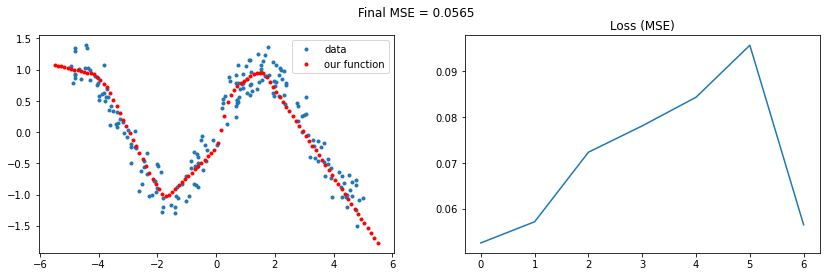

In [153]:
x,y = genarate_data_1d(points=200, min=-5, max=5, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-5.5, stop=5.5, num=100)
model.compile(loss='mse', optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y, epochs = 7, batch_size = 50, verbose = 1)
pred_y = model.predict(pred_x)
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 3</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Hint: <strong style="color:#01ff84">Standard scale</strong> the data.</p>
<div>

In [119]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()


In [137]:
model = keras.Sequential([
    #input
    layers.Dense(units = 7, activation = 'relu', input_shape =(1,)),
    
    layers.Dense(units = 15, activation ='relu'),
   
    #output
    layers.Dense(units = 1, name = 'regression')
])


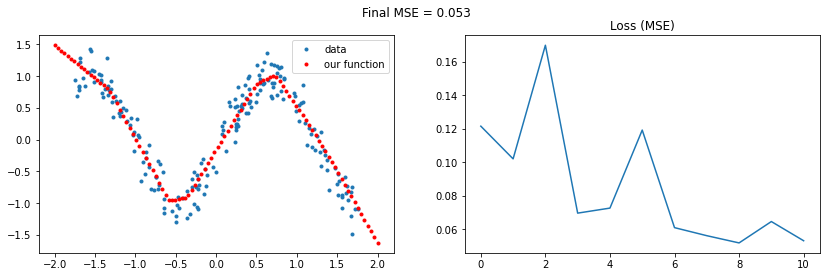

In [149]:
x,y = genarate_data_1d(points=200, min=1000, max=1010, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-2, stop=2, num=100)
x = sts.fit_transform(x)
model.compile(loss='mse', optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y, epochs = 11, batch_size = 50, verbose = 0)
pred_y = model.predict(pred_x)
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 4</strong>
  <p>Train a MLP to fit the data</p>
<div>

In [226]:
model = keras.Sequential([
    #input
    layers.Dense(units = 50, activation = 'relu', input_shape =(1,)),
    layers.Dense(units = 30, activation ='relu'),
    layers.Dense(units = 20, activation ='relu'),
    layers.Dense(units = 10, activation ='relu'),
   
    #output
    layers.Dense(units = 1, name = 'regression')
])


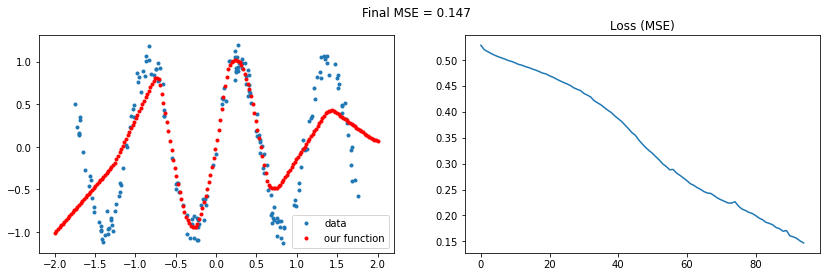

In [227]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=np.sin,  noise=0.1)
pred_x = np.linspace(start=-2, stop=2, num=200)
x = sts.fit_transform(x)
model.compile(loss='mse', optimizer = 'adam')
hist = model.fit(x,y, epochs = 95, batch_size = 50, verbose = 0)
pred_y = model.predict(pred_x)
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 5</strong>
  <p>Train a MLP to fit the data</p>
<div>

In [218]:
model = keras.Sequential([
    #input
    layers.Dense(units = 50, activation = 'relu', input_shape =(1,)),
    layers.Dense(units = 30, activation ='relu'),
    layers.Dense(units = 20, activation ='relu'),
    layers.Dense(units = 10, activation ='relu'),
   
    #output
    layers.Dense(units = 1, name = 'regression')
])

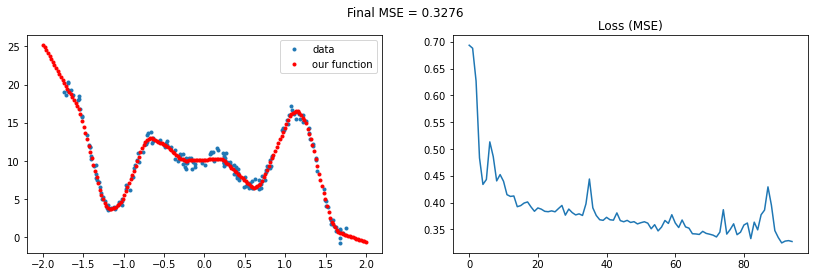

In [225]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=lambda x: np.cos(x)*x+10, noise=0.5)
pred_x = np.linspace(start=-2, stop=2, num=200)
x = sts.fit_transform(x)
model.compile(loss='mse', optimizer = 'adam')
hist = model.fit(x,y, epochs = 95, batch_size = 50, verbose = 0)
pred_y = model.predict(pred_x)
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 6</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Train a LGBMRegressor to fit the data and visualize the predictions</p>
<div>

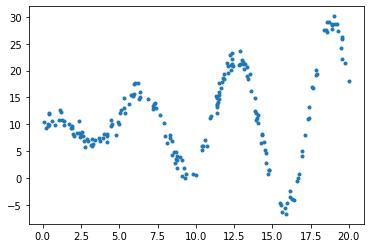

In [10]:
x,y = genarate_data_1d(points=200, min=0, max=20, fn=lambda x: np.cos(x)*x+10, noise=1)
pred_x = np.linspace(start=-2, stop=2, num=200).reshape(200,-1)

plt.plot(x,y,".");